# Build a model to predict performance of employees, based on the visualisation and analysis of past data of employee performance

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Task 1: Read Data

In [2]:
# Read CSV file
df = pd.read_csv("Test_data.csv")

In [3]:

# Inspect data
print("First 5 rows:\n", df.head())
print("\nData Info:")
print(df.info())
print("\nData Shape:", df.shape)

First 5 rows:
    employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5     

## Task 2: Data Cleaning

In [4]:
# Check missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64


In [5]:
# Fill missing values
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].median())

In [6]:
# Remove duplicates
df = df.drop_duplicates()

In [7]:
# Drop identifier column (not useful for ML)
df = df.drop(columns=['employee_id'])

- Columns irrelevant to prediction such as unique identifiers were removed. Remaining features were retained as they represent employee demographics, performance indicators, and engagement metrics that influence promotion outcomes.

In [8]:
print("\nAfter Cleaning - Missing Values:\n", df.isnull().sum())
print("Final Shape:", df.shape)


After Cleaning - Missing Values:
 department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64
Final Shape: (23490, 12)


## Task 3: Visualization

### Department Distribution

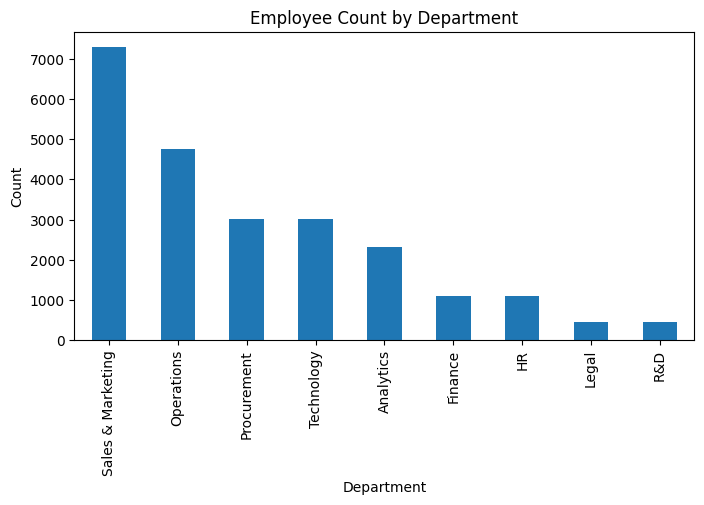

In [9]:
plt.figure(figsize=(8,4))
df['department'].value_counts().plot(kind='bar')
plt.title('Employee Count by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()


1. Department Imbalance 
- Some departments dominate the dataset.

- This means department will heavily influence predictions.

- Ignoring this feature later would be ignorant, not minimalist.

### Gender Distribution

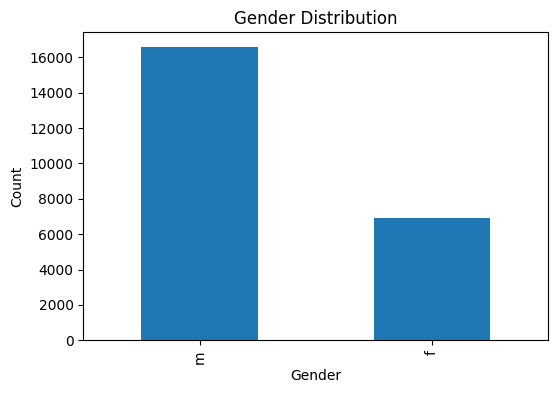

In [10]:
plt.figure(figsize=(6,4))
df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


2. Gender Distribution Is Uneven

- One gender clearly outnumbers the other.

- This is not a modeling issue, but it can cause biased predictions.

### Education Level

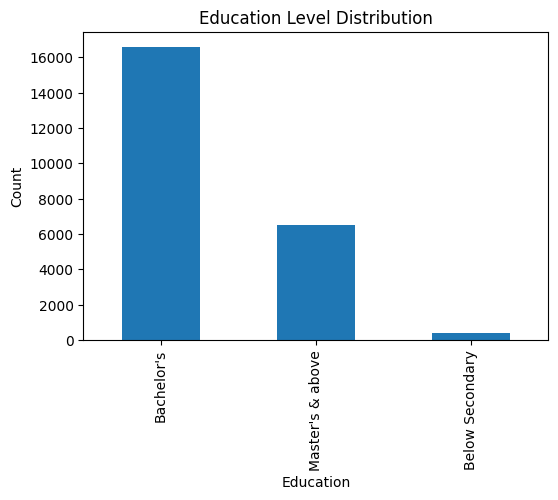

In [11]:
plt.figure(figsize=(6,4))
df['education'].value_counts().plot(kind='bar')
plt.title('Education Level Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()


3. Education Levels Are Skewed

- Most employees fall into one or two education categories.

- Rare education levels carry less statistical weight.

### Recruitment Channel

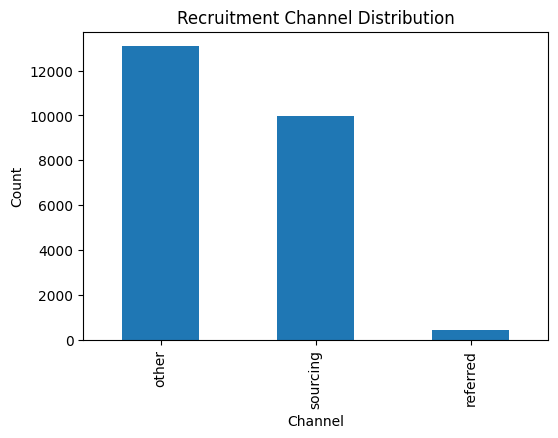

In [12]:
plt.figure(figsize=(6,4))
df['recruitment_channel'].value_counts().plot(kind='bar')
plt.title('Recruitment Channel Distribution')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()


4. Recruitment Channel Shows Clear Dominance

- One hiring channel supplies most employees.

- This may correlate with performance or promotion likelihood.

## Task 4: Data Scaling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features & target
X = df_encoded.drop('KPIs_met >80%', axis=1)
y = df_encoded['KPIs_met >80%']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Scaling function
def apply_scalers(X_train, X_test):
    scalers = {
        "StandardScaler": StandardScaler(),
        "MinMaxScaler": MinMaxScaler(),
        "RobustScaler": RobustScaler(),
        "MaxAbsScaler": MaxAbsScaler()
    }
    
    scaled_data = {}
    
    for name, scaler in scalers.items():
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        scaled_data[name] = {
            "X_train": X_train_scaled,
            "X_test": X_test_scaled
        }
    
    return scaled_data

scaled_datasets = apply_scalers(X_train, X_test)


#### Although tree-based models are scale-invariant, scaling was applied to ensure consistent preprocessing and to experimentally validate whether scaling impacts model convergence or accuracy.

## Task 5: Baseline Models

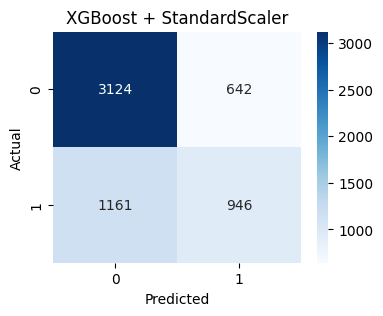

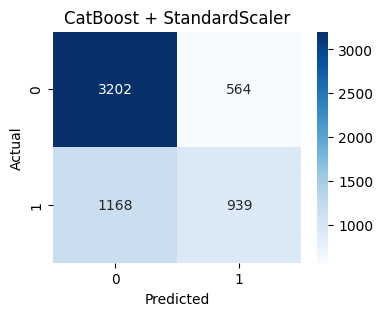

[LightGBM] [Info] Number of positive: 6322, number of negative: 11295
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 17617, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358858 -> initscore=-0.580325
[LightGBM] [Info] Start training from score -0.580325


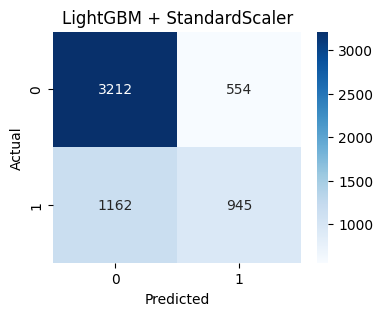

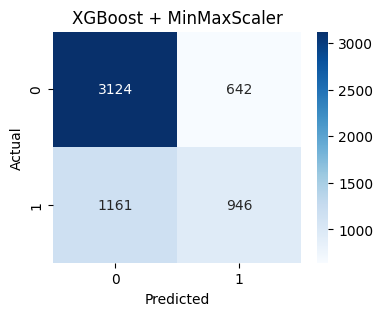

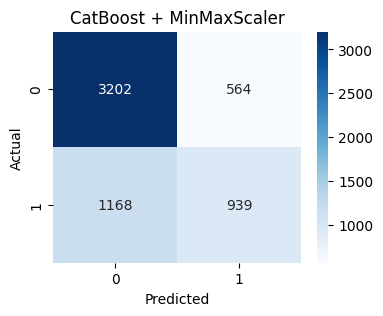

[LightGBM] [Info] Number of positive: 6322, number of negative: 11295
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 17617, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358858 -> initscore=-0.580325
[LightGBM] [Info] Start training from score -0.580325


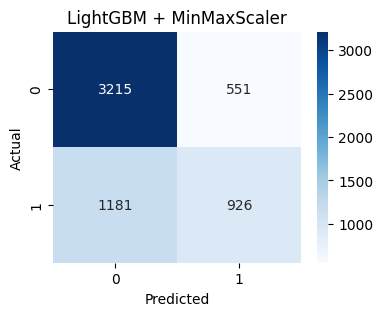

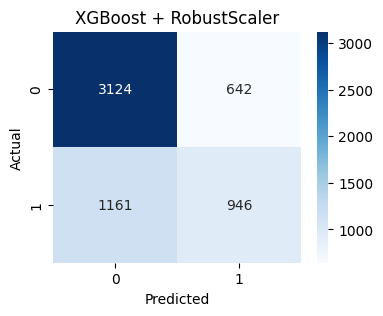

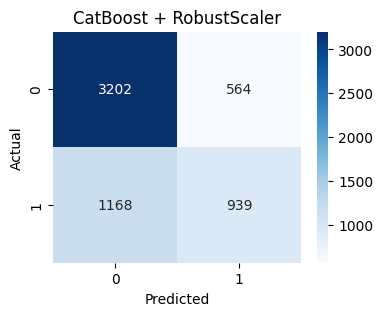

[LightGBM] [Info] Number of positive: 6322, number of negative: 11295
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 17617, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358858 -> initscore=-0.580325
[LightGBM] [Info] Start training from score -0.580325


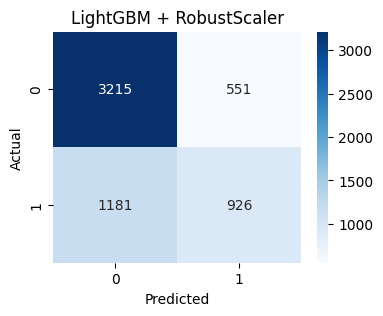

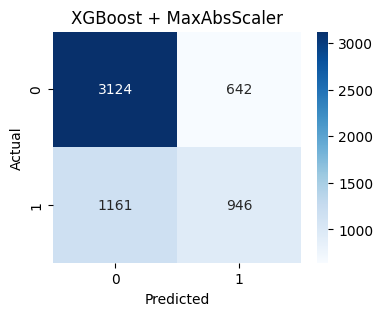

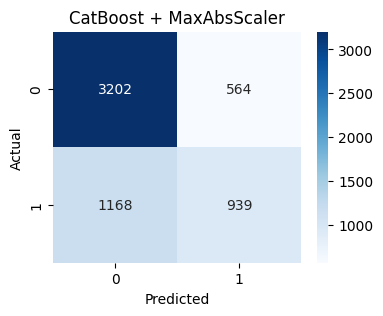

[LightGBM] [Info] Number of positive: 6322, number of negative: 11295
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 243
[LightGBM] [Info] Number of data points in the train set: 17617, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358858 -> initscore=-0.580325
[LightGBM] [Info] Start training from score -0.580325


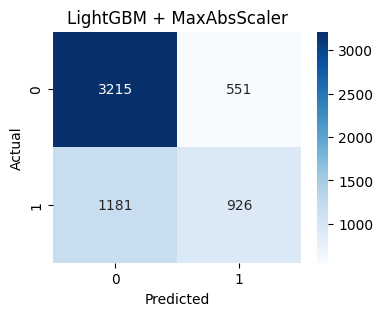

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

results = []

for scaler_name, data in scaled_datasets.items():
    for model_name, model in models.items():
        model.fit(data['X_train'], y_train)
        preds = model.predict(data['X_test'])
        acc = accuracy_score(y_test, preds)
        
        results.append([scaler_name, model_name, acc])
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, preds)
        plt.figure(figsize=(4,3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{model_name} + {scaler_name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()


## Task 6: Results Summary

In [ ]:
results_df = pd.DataFrame(
    results, columns=['Scaler', 'Model', 'Accuracy']
)

print(results_df)


            Scaler     Model  Accuracy
0   StandardScaler   XGBoost  0.693002
1   StandardScaler  CatBoost  0.705091
2   StandardScaler  LightGBM  0.707815
3     MinMaxScaler   XGBoost  0.693002
4     MinMaxScaler  CatBoost  0.705091
5     MinMaxScaler  LightGBM  0.705091
6     RobustScaler   XGBoost  0.693002
7     RobustScaler  CatBoost  0.705091
8     RobustScaler  LightGBM  0.705091
9     MaxAbsScaler   XGBoost  0.693002
10    MaxAbsScaler  CatBoost  0.705091
11    MaxAbsScaler  LightGBM  0.705091
